In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from heat_1d_2d import heat_1d_nn, heat_2d_nn

np.random.seed(238)
torch.manual_seed(301)

/tmp/ipykernel_620/711812700.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
/tmp/ipykernel_620/711812700.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)


Epoch 0, Loss: 10079.012695
Epoch 50, Loss: 6905.445801
Epoch 100, Loss: 6799.271973
Epoch 150, Loss: 6788.007324
Epoch 200, Loss: 6735.640137
Epoch 250, Loss: 6692.569824
Epoch 300, Loss: 6676.432129
Epoch 350, Loss: 6650.832031
Epoch 400, Loss: 6699.921387
Epoch 450, Loss: 6636.054199
Epoch 500, Loss: 6628.853516
Epoch 550, Loss: 6623.337402
Epoch 600, Loss: 6628.922363
Epoch 650, Loss: 6610.890625
Epoch 700, Loss: 6605.978027
Epoch 750, Loss: 6329.058594
Epoch 800, Loss: 6124.688965
Epoch 850, Loss: 5991.029785
Epoch 900, Loss: 5744.008789
Epoch 950, Loss: 5510.070312
Epoch 1000, Loss: 5304.989746
Epoch 1050, Loss: 5172.001465
Epoch 1100, Loss: 5055.697754
Epoch 1150, Loss: 4965.057129
Epoch 1200, Loss: 4884.536621
Epoch 1250, Loss: 4556.363770
Epoch 1300, Loss: 2710.009521
Epoch 1350, Loss: 2240.380859
Epoch 1400, Loss: 1214.383301
Epoch 1450, Loss: 983.354797
Epoch 1500, Loss: 805.262573
Epoch 1550, Loss: 726.318970
Epoch 1600, Loss: 644.476135
Epoch 1650, Loss: 563.379944
Epoch 1

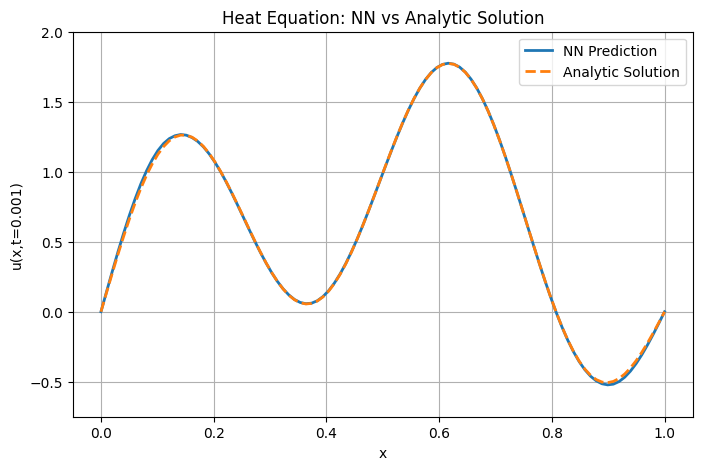

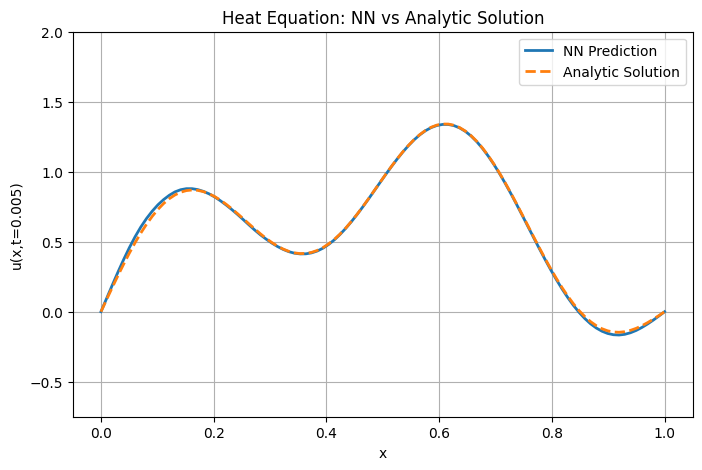

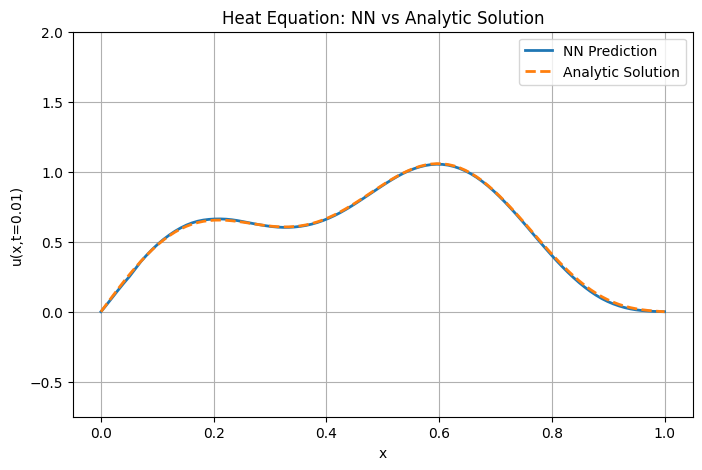

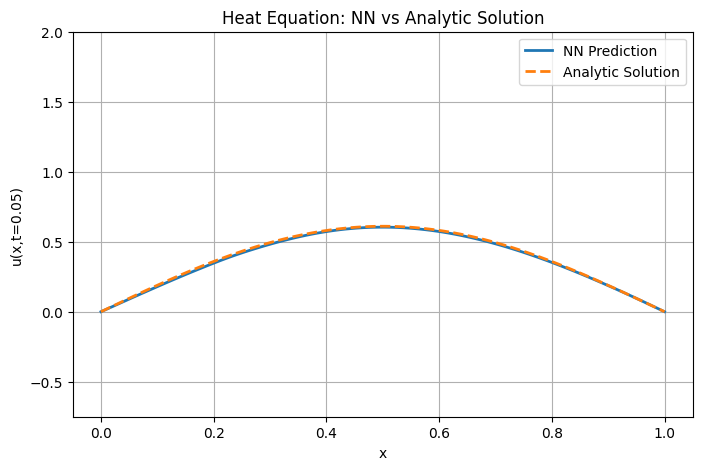

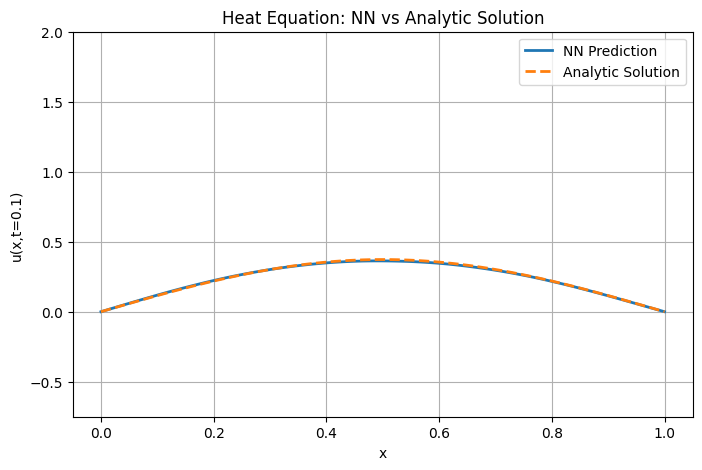

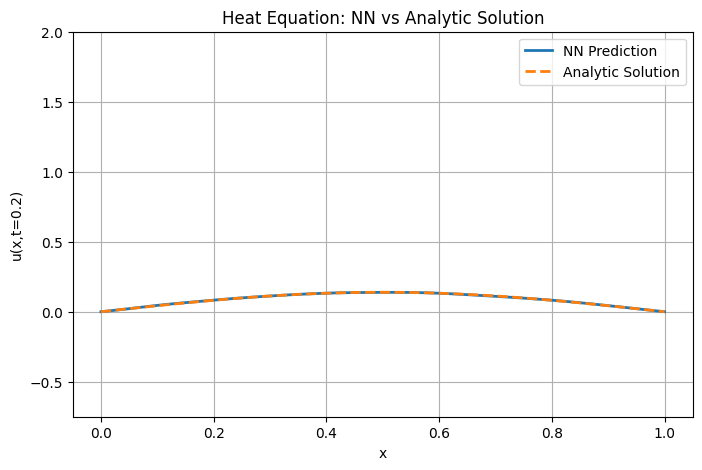

In [12]:
layers = [32, 64, 128, 128, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
pde_nn = heat_1d_nn(layers, activations)

N_colloc = 100

x = np.linspace(0, 1, N_colloc)
t = np.linspace(0, 0.2, N_colloc)

xs, ts = np.meshgrid(x, t)

xs = torch.tensor(xs, dtype=torch.float32).view(-1, 1)
ts = torch.tensor(ts, dtype=torch.float32).view(-1, 1)

x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)

# gives relatively good results (compared to other parameters, still bad though)
pde_nn.train(x_colloc, t_colloc, lr=1e-2, weight_decay=0.0, epochs = 2_000, print_epochs=50)
#proper result for epochs =5000
pde_nn.train_lbfgs(x_colloc, t_colloc, lr=1e-1, epochs=100, max_iter=30)

for t in [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]:
    x_test = torch.linspace(0,1,100).view(-1,1)
    t_test = torch.tensor([[t]]*100)  # t=0.5
    u_pred = pde_nn.trial_solution(x_test, t_test).detach().numpy()


    #compare results with analytic solution

    x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
    t_val = t
    u_analytic = np.sin(np.pi * x_np) * np.exp(-np.pi**2 * t_val) + np.sin(4 * np.pi * x_np
                    ) * np.exp(- 16 * np.pi**2 * t_val) 

    # Plot the results
    plt.figure(figsize=(8,5))
    plt.plot(x_np, u_pred, label='NN Prediction', linewidth=2)
    plt.plot(x_np, u_analytic, '--', label='Analytic Solution', linewidth=2)
    plt.xlabel('x')
    plt.ylabel(f'u(x,t={t})')
    plt.ylim(-0.75, 2.0)
    plt.title('Heat Equation: NN vs Analytic Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
"""
2D Heat equation
"""

layers = [32, 64, 128, 128, 1]
activations = [torch.tanh]*(len(layers)-1) + [None]


N_colloc = 50

x = np.linspace(0, 1, N_colloc)
y = np.linspace(0, 1, N_colloc)
t = np.linspace(0, 1, N_colloc)

xs, ys, ts = np.meshgrid(x, y, t)

xs = torch.tensor(xs, dtype=torch.float32).view(-1, 1)
ys = torch.tensor(ys, dtype=torch.float32).view(-1, 1)
ts = torch.tensor(ts, dtype=torch.float32).view(-1, 1)

x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
y_colloc = torch.tensor(ys, dtype=torch.float32).view(-1,1)
t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)

pde_nn = heat_2d_nn(layers, activations)

pde_nn.train(x_colloc, y_colloc, t_colloc, lr=1e-2, weight_decay=0, epochs = 1_000, print_epochs=50)
#proper result for epochs =5000
pde_nn.train_lbfgs(x_colloc, t_colloc, lr=1, epochs=20, max_iter=30)

x_test = torch.linspace(0,1,100).view(-1,1)
y_test = torch.linspace(0,1,100).view(-1,1)
t_test = torch.tensor([[0.001]]*100)  # t=0.001
u_pred = pde_nn.trial_solution(x_test, y_test, t_test).detach().numpy()


#compare results with analytic solution

x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
y_np = y_test.numpy().flatten()
t_val = 0.5
u_analytic = np.sin(np.pi * x_np) * np.sin(np.pi * y_np) * np.exp(
    -2 * np.pi**2 * t_val) + np.sin(2 * np.pi * x_np) * np.sin(4 * np.pi * x_np
    ) * np.exp(-20 * np.pi**2 * t_val)

/tmp/ipykernel_2528/3789127346.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
/tmp/ipykernel_2528/3789127346.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_colloc = torch.tensor(ys, dtype=torch.float32).view(-1,1)
/tmp/ipykernel_2528/3789127346.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)


: 